In [1]:
#importing csv file
import numpy as np
import pandas as pd 
sdata= pd.read_csv('D:/Datamining and machine learning/suicidedata.csv')
sdata.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country_year,HDI _for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [16]:
sdata.shape

(27820, 12)

In [2]:
sdata=sdata.rename(columns={'country':'country','year':'year','sex':'gender','age':'age','suicides_no':'suicidesno',
                            'population':'population','suicides/100k pop':'suicidesperpop',
                            'HDI _for_year':'HDI_for_year',' gdp_for_year':'gdp_for_year',
                          'gdp_per_capita':'gdp_per_capital','generation':'generation'})

In [5]:
#checking for missing values
sdata.isnull().sum(axis = 0)

country                  0
year                     0
gender                   0
age                      0
suicidesno               0
population               0
suicides/100k_pop        0
country_year             0
HDI_for_year         19456
gdp_for_year             0
gdp_per_capital          0
generation               0
dtype: int64

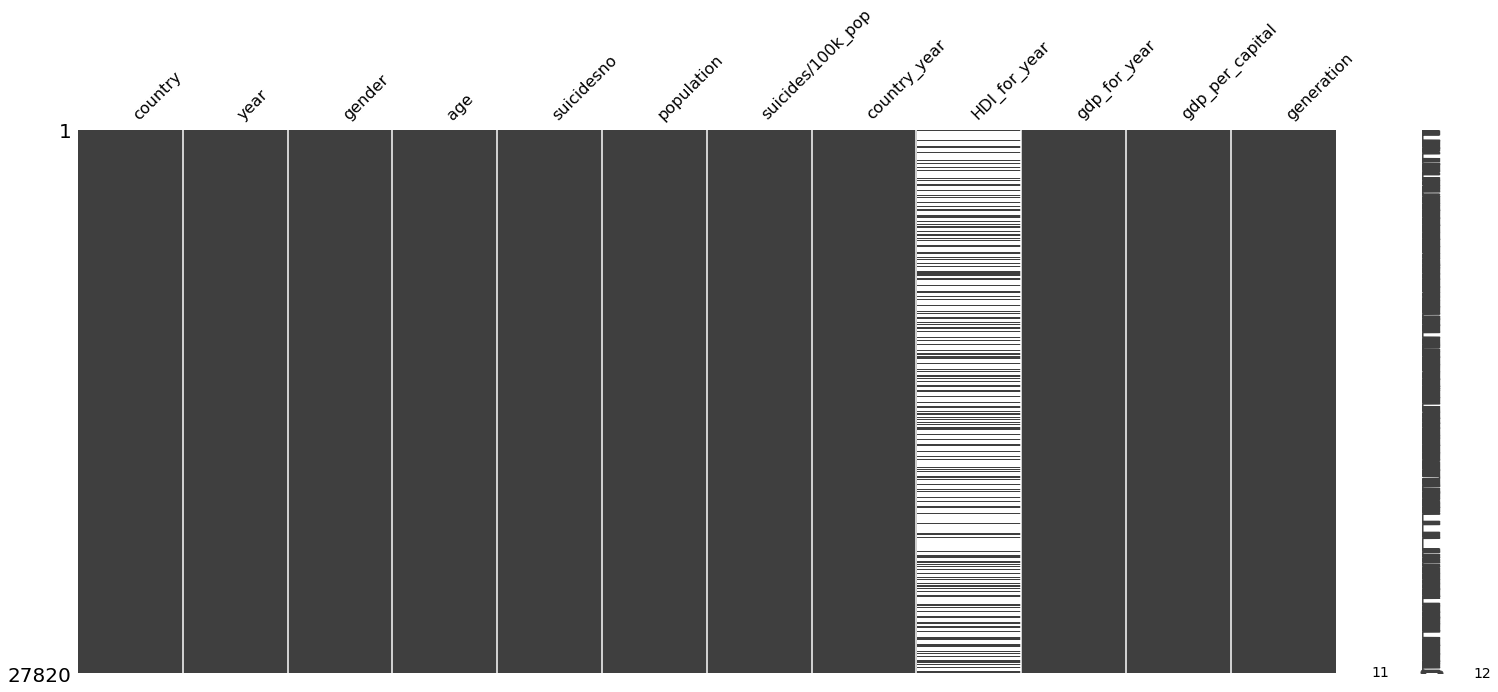

In [4]:
# graphical representation of missing values
import missingno as msno 
msno.matrix(sdata)

In [6]:
#imputing the missing values using median
sdata1=sdata
sdata1.HDI_for_year = sdata1.HDI_for_year.fillna(sdata1.HDI_for_year.median())
sdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
gender               27820 non-null object
age                  27820 non-null object
suicidesno           27820 non-null int64
population           27820 non-null int64
suicides/100k_pop    27820 non-null float64
country_year         27820 non-null object
HDI_for_year         27820 non-null float64
gdp_for_year         27820 non-null object
gdp_per_capital      27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
sdata1=sdata.rename(columns={'suicides/100k_pop':'suicidesperpop'})
sdata2=sdata1[['suicidesno','suicidesperpop','population','HDI_for_year','gdp_per_capital']]
sdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 5 columns):
suicidesno         27820 non-null int64
suicidesperpop     27820 non-null float64
population         27820 non-null int64
HDI_for_year       27820 non-null float64
gdp_per_capital    27820 non-null int64
dtypes: float64(2), int64(3)
memory usage: 1.1 MB


In [10]:
suicide_corr = sdata2.corr()["suicidesno"]
suicide_corr.abs().sort_values(ascending=False)[1:]

population         0.616162
suicidesperpop     0.306604
HDI_for_year       0.063224
gdp_per_capital    0.061330
Name: suicidesno, dtype: float64

In [11]:
#correlation matrix
sdata2.corr()

,suicidesno,suicidesperpop,population,HDI_for_year,gdp_per_capital
suicidesno,1.000000,0.306604,0.616162,0.063224,0.061330
suicidesperpop,0.306604,1.000000,0.008285,0.037894,0.001785
population,0.616162,0.008285,1.000000,0.057240,0.081510
HDI_for_year,0.063224,0.037894,0.057240,1.000000,0.502250
gdp_per_capital,0.061330,0.001785,0.081510,0.502250,1.000000


In [12]:
from sklearn.model_selection import train_test_split

x = sdata2[sdata2.loc[:, sdata2.columns != 'suicidesno'].columns] 
y = sdata2['suicidesno']

In [13]:
#OLS- statistical linear model was applied to check r-square 
import statsmodels.formula.api as smf
model= smf.ols("suicidesno ~ population  + HDI_for_year + gdp_per_capital + suicidesperpop", data=sdata2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             suicidesno   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     6188.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        19:21:10   Log-Likelihood:            -2.1993e+05
No. Observations:               27820   AIC:                         4.399e+05
Df Residuals:                   27815   BIC:                         4.399e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -411.3494     67.324     -6.110      0.000    -543.308    -279.391
population          0.0001   1.01e-06    139.941      0.000       0.000       0.000
HDI_for_year      266.2567     88.955      2.993      0.003      91.900     440.614
gdp_per_capital     0.0002      0.000      0.648      0.517      -0.000       0.001
suicidesperpop     14.3170      0.208     68.934      0.000      13.910      14.724
==============================================================================
Omnibus:                    43059.132   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45887269.760
Skew:                           9.560   Prob(JB):                         0.00
Kurtosis:                     201.043   Cond. No.                     1.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# dataset was split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [15]:
sdata2.shape

(27820, 5)

In [17]:
x_train.shape

(22256, 4)

In [18]:
x_test.shape

(5564, 4)

In [19]:
#apllying multiple linear regression on the data 
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)
y_pred=mlr.predict(x_test)
mlr.score(x_test,y_test)
# print("Accuracy: %.2f%%" % (res*100.0))

0.5146336285133746

In [20]:
#Evaluation metrics are obtained
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error :"+ metrics.mean_absolute_error(y_test,y_pred).astype(str))
print("Root Mean Squared Error :" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))
print("R square :"+ r2_score(y_test,y_pred).astype(str))

Mean Absolute Error :246.71785407232883
Root Mean Squared Error :535.2709147930026
R square :0.5146336285133746


In [21]:
# to compare RMSE value of training and testing 
y_pred_x_train=mlr.predict(x_train)
print("Multiple linear Regression")
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,y_pred_x_train)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))

Multiple linear Regression
RMSE value of Training dataset:683.2108299137507
RMSE value of testing dataset:535.2709147930026


In [24]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(mlr, x_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())
cv_res

0.4540830710056106


array([0.43881136, 0.43620901, 0.47653188, 0.46478003])

In [26]:
# validating the model using K-fold validation 
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10, random_state=2)
results_kfold = cross_val_score(mlr, x_train, y_train, cv=kfold, scoring="r2")
print("KFold Validation")
print("R-square: " + results_kfold.mean().astype(str))

KFold Validation
R-square: 0.4494863701890942


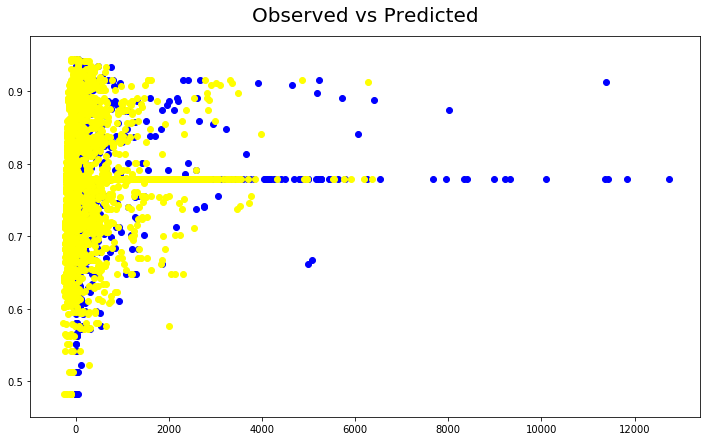

In [22]:
# graphical representation of observed and predicted value
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("Observed vs Predicted",size=20,pad=15)
#plt.xlabel('Rating',size = 15)
#plt.ylabel('Frequency',size = 15)
plt.scatter(y_pred,x_test.iloc[:,2],color="yellow")

In [27]:
#applying gradient bosting algorithm
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=3,learning_rate=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.8716665325205606

In [28]:
# Evaluation metrics are obtained
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error :"+ metrics.mean_absolute_error(y_test,y_pred).astype(str))
print("Root Mean Squared Error :" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))
print("R square :"+ r2_score(y_test,y_pred).astype(str))

Mean Absolute Error :94.96026153674902
Root Mean Squared Error :275.2382376978053
R square :0.8716665325205606


In [29]:
#comparing RMSE value of training and testing set
y_pred_x_train=model.predict(x_train)
print("Gradient Boosting Regression")
print("RMSE value of Training dataset:" + np.sqrt(metrics.mean_squared_error(y_train,y_pred_x_train)).astype(str))
print("RMSE value of testing dataset:" + np.sqrt(metrics.mean_squared_error(y_test,y_pred)).astype(str))

Gradient Boosting Regression
RMSE value of Training dataset:268.18751178245014
RMSE value of testing dataset:275.2382376978053


In [30]:
from sklearn.model_selection import cross_val_score
cv_res = cross_val_score(model, x_train, y_train, cv=4, scoring="r2")
print(cv_res.mean())
cv_res

0.8960786197000691


array([0.87229335, 0.88934485, 0.91707984, 0.90559644])

In [31]:
#model is validated using K-fold validation
from sklearn.model_selection import KFold
results_kfold = cross_val_score(model, x_train, y_train, cv=kfold, scoring="r2")
print("KFold Validation")
print("R-square: " + results_kfold.mean().astype(str))


KFold Validation
R-square: 0.8966820507108684


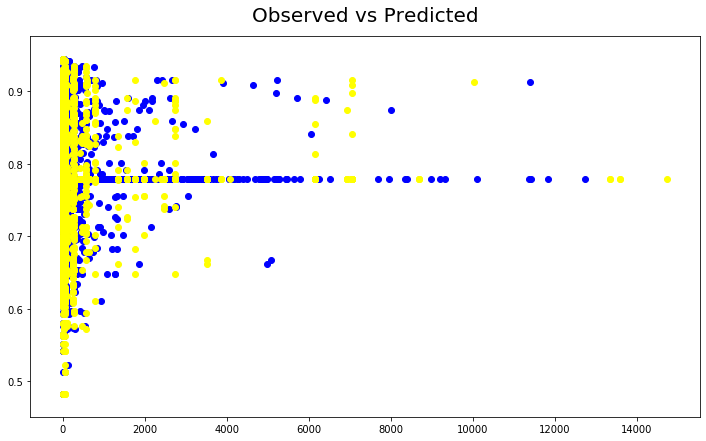

In [32]:
#pictorial representation of observed and predicted value
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("Observed vs Predicted",size=20,pad=15)
#plt.xlabel('Rating',size = 15)
#plt.ylabel('Frequency',size = 15)
plt.scatter(y_pred,x_test.iloc[:,2],color="yellow")